In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *
from tsmoothie.utils_func import sim_randomwalk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

import scipy as sp
import scipy.stats as stats
sns.set()

week = 24  # time length of total observation (in weeks)
bmi = 22  # unit in lbs       
n = 21  # number of measurements per week
dist = 'normal'  # Daily weight fluctuation:  'normal' or 'uniform'
wl = 1 - 0.01

df = pd.DataFrame()
# data = np.empty([1, 21])
x = []
y = []

days = week * 7 +1
x = [x for x in range(1,days)]
#print(x)
x = sorted(x)
x = np.transpose(x)
x = np.repeat(x,n/7)
#print(x)

for i in range(week):
    time = i + 1
    avg_bmi = bmi * wl ** i
    # print(time)
    # print("%.2f" % avg_weight)
    #if dist == 'uniform':
    #ll = avg_bmi * (1 - 0.0174)  # 1.74% body fat fluctuation by imaging (or close to the weight fluc)
    #ul = avg_bmi * (1 + 0.0174)
    # w = np.random.uniform(ll, ul, n)  # assuming uniform distribution during a day
    #elif dist == 'normal':
    #avg_bmi = np.repeat(avg_bmi,7)
    #print(avg_bmi)
    w = np.random.normal(avg_bmi, 1, n)  # assuming normal distribution during a day
        # w = np.expand_dims(w, axis=0)
        # print(type(w))


    # col_list = ['week' + str(x) for x in range(1, week+1)]
    # weeks = [x for x in range(1, 21)]
    # print(weeks)
    y = np.append(y, w, axis=0)  # bmi
    

#y = np.repeat(y, 7)
y = np.transpose(y)
#print(y.shape)

#data = {'Time': [x], 'Weight': [y]}
data1 = np.stack((x, y), axis = 1)
#data = list(data.items())
#data = np.array(data)

#print(type(data))
#print(data.shape)
df = pd.DataFrame(data1)
#print(data)
print(x.shape)
print(y.shape)

(504,)
(504,)


In [2]:
X = np.ones((len(y), 2))
X[:,1] = x
re = sm.OLS(y, X).fit()

In [3]:
print(X.shape)

(504, 2)


In [4]:
from statsmodels.stats.outliers_influence import summary_table
import numpy as np
import matplotlib.pyplot as plt

st, data, ss2 = summary_table(re, alpha=0.05)
print(data.shape)
print(data)

(504, 12)
[[ 1.00000000e+00  2.09927770e+01  2.19252472e+01 ...  9.68815454e-01
  -9.62484833e-01  3.67235833e-03]
 [ 2.00000000e+00  2.19450314e+01  2.19252472e+01 ...  9.68815454e-01
   2.04209997e-02  1.65314619e-06]
 [ 3.00000000e+00  2.24818340e+01  2.19252472e+01 ...  9.68815454e-01
   5.74502382e-01  1.30840119e-03]
 ...
 [ 5.02000000e+02  1.66999964e+01  1.72589843e+01 ...  9.68815454e-01
  -5.76980808e-01  1.31971453e-03]
 [ 5.03000000e+02  1.65962456e+01  1.72589843e+01 ...  9.68815454e-01
  -6.84071186e-01  1.85506810e-03]
 [ 5.04000000e+02  1.72748742e+01  1.72589843e+01 ...  9.68815454e-01
   1.64013500e-02  1.06639096e-06]]


In [5]:
st, data, ss2 = summary_table(re, alpha=0.05)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

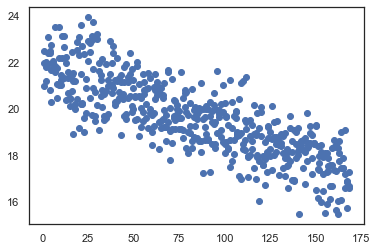

In [6]:
sns.set_style("white")
plt.scatter(x, y)
plt.show()

In [7]:
#summary_table(re, alpha=0.05)

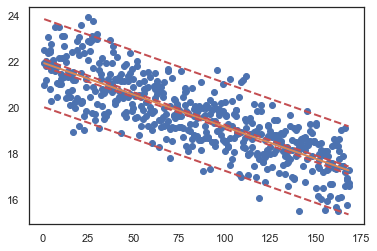

In [8]:
plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'r--', lw=2)
plt.plot(x, predict_ci_upp, 'r--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()

In [9]:
summary_table(re, alpha=0.05)

(<class 'statsmodels.iolib.table.SimpleTable'>,
 array([[ 1.00000000e+00,  2.09927770e+01,  2.19252472e+01, ...,
          9.68815454e-01, -9.62484833e-01,  3.67235833e-03],
        [ 2.00000000e+00,  2.19450314e+01,  2.19252472e+01, ...,
          9.68815454e-01,  2.04209997e-02,  1.65314619e-06],
        [ 3.00000000e+00,  2.24818340e+01,  2.19252472e+01, ...,
          9.68815454e-01,  5.74502382e-01,  1.30840119e-03],
        ...,
        [ 5.02000000e+02,  1.66999964e+01,  1.72589843e+01, ...,
          9.68815454e-01, -5.76980808e-01,  1.31971453e-03],
        [ 5.03000000e+02,  1.65962456e+01,  1.72589843e+01, ...,
          9.68815454e-01, -6.84071186e-01,  1.85506810e-03],
        [ 5.04000000e+02,  1.72748742e+01,  1.72589843e+01, ...,
          9.68815454e-01,  1.64013500e-02,  1.06639096e-06]]),
 ['Obs',
  'Dep Var\nPopulation',
  'Predicted\nValue',
  'Std Error\nMean Predict',
  'Mean ci\n95% low',
  'Mean ci\n95% upp',
  'Predict ci\n95% low',
  'Predict ci\n95% upp',
  

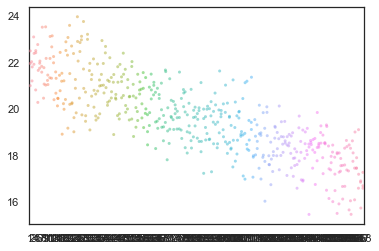

In [10]:
sns.set_style("white")
ax = sns.stripplot(x=x, y=y, s=3, alpha=0.5, jitter=0.2)

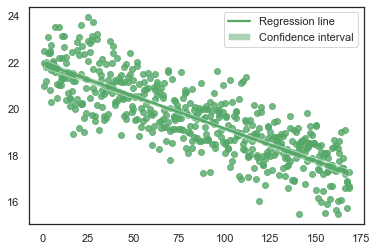

In [11]:
#ax = sns.regplot(x=x, y=y, marker = "+")
ax = sns.regplot(x=x, y=y, color = "g",line_kws={'label': 'Regression line'})
#ax = sns.regplot(x, y, line_kws={'label': 'Regression line'})
plt.setp(ax.collections[1], alpha=0.5)
ax.collections[1].set_label('Confidence interval')
ax.legend()

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None]

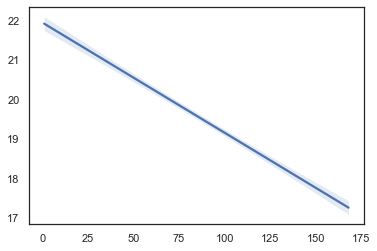

In [12]:
sns.regplot(x, y, df, ci=95, scatter=False)
plt.setp(ax.collections[1], alpha=0.8)

In [13]:
#np.random.seed(33)
#data = sim_randomwalk(n_series=10, timesteps=200, 
#                      process_noise=10, measure_noise=30)
print(data1.shape)
#print(data[:,1])
#plt.plot(data[:,0], data[:,1], '+') 

(504, 2)


In [14]:
import statsmodels.api as sm
#
# Automatically:
#lm_fit = sm.OLS(data1[:,1], data1[:,0]).fit()
x = sm.add_constant(x)

In [15]:
print(x.shape)

(504, 2)


In [16]:
lm_fit = sm.OLS(y, x).fit()

In [17]:
# Old way:
#from statsmodels.stats.outliers_influence import summary_table
#dt = summary_table(lm_fit, alpha = 0.05)
#print(dt) 
#y_prd = dt[:, 2]
#yprd_ci_lower, yprd_ci_upper = dt[:, 6:8].T
# New way:
#dt = lm_fit.get_prediction(y).summary_frame()
dt = lm_fit.get_prediction(x).summary_frame(alpha = 0.05)

In [18]:
print(dt.shape)

(504, 6)


In [19]:
#from statsmodels.stats.outliers_influence import summary_table
#st, data, ss2 = summary_table(lm_fit, alpha=0.05)
#print(data.shape)
print(dt)

          mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0    21.925247  0.086265      21.755762      22.094732     20.006783   
1    21.925247  0.086265      21.755762      22.094732     20.006783   
2    21.925247  0.086265      21.755762      22.094732     20.006783   
3    21.897306  0.085494      21.729336      22.065275     19.978974   
4    21.897306  0.085494      21.729336      22.065275     19.978974   
..         ...       ...            ...            ...           ...   
499  17.286926  0.085494      17.118957      17.454895     15.368595   
500  17.286926  0.085494      17.118957      17.454895     15.368595   
501  17.258984  0.086265      17.089499      17.428469     15.340520   
502  17.258984  0.086265      17.089499      17.428469     15.340520   
503  17.258984  0.086265      17.089499      17.428469     15.340520   

     obs_ci_upper  
0       23.843712  
1       23.843712  
2       23.843712  
3       23.815637  
4       23.815637  
..            .

In [20]:
#dt = dt.to_numpy()

In [21]:
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
print(pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper])).head())

           0          1          2
0  21.925247  20.006783  23.843712
1  21.925247  20.006783  23.843712
2  21.925247  20.006783  23.843712
3  21.897306  19.978974  23.815637
4  21.897306  19.978974  23.815637


In [22]:
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']

ym_ci_lower = dt['mean_ci_lower'] 
ym_ci_upper = dt['mean_ci_upper']
#print(pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper])).head())
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     978.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          5.81e-120
Time:                        16:21:20   Log-Likelihood:                -700.17
No. Observations:                 504   AIC:                             1404.
Df Residuals:                     502   BIC:                             1413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9532      0.087    252.223      0.0

In [36]:
#print(x[:,1])

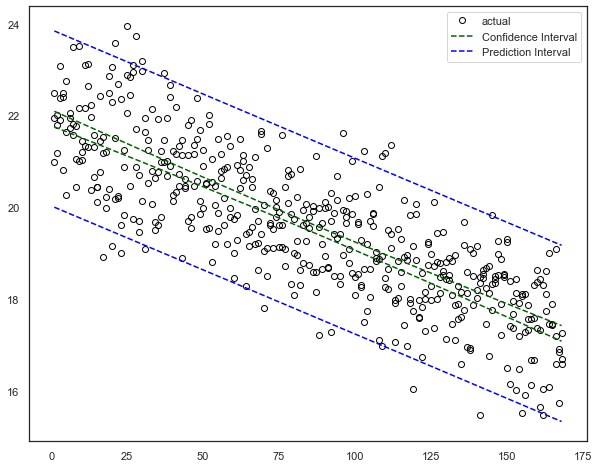

In [35]:
plt.figure(num = 2, figsize=(10, 8))
plt.plot(x[:,1], y, linestyle = "None", marker = "o", label = "actual",
         markerfacecolor = "None", color = "black")
#plt.plot(x, y_fit, color = "red", label = "OLS")

plt.plot(x[:,1], ym_ci_lower, color = "darkgreen", linestyle = "--", 
         label = "Confidence Interval")
plt.plot(x[:,1], ym_ci_upper, color = "darkgreen", linestyle = "--")

plt.plot(x[:,1], yprd_ci_lower, color = "blue", linestyle = "--", 
         label = "Prediction Interval")
plt.plot(x[:,1], yprd_ci_upper, color = "blue", linestyle = "--")

plt.legend()
plt.show()